<a href="https://colab.research.google.com/github/Brokttv/optimizers-from-scratch/blob/main/Optims_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook implements polular optimization algorithms from sratch using NumPy, and includes the following:


*   Schotastic Gradient Descent
*   Full Batch Gradient Descent
*   Mini Batch Gradient Descent with **momentum**

*   Mini Batch Gradient Descent with **NAG**

*   Mini Batch Gradient Descent with **ADAGRAD**

*   Mini Batch Gradient Descent with **ADAM**
*   Mini Batch Gradient Descent with **RMSProp**






Updated input weight:
[[-6.4769011  -7.42638306 -7.8611899 ]
 [-1.59520111 -0.70507891 -3.06135183]
 [ 0.52129976 -0.70828793 -0.44407388]
 [-0.12248298 -1.03004036 -3.42573044]]

Updated output weight:
[-0.34948196 -0.5098778   0.07041231  0.19244263]

Updated input bias:
[[-6.14044903 -0.25958482  0.40198478 -0.30288064]
 [-0.93701382 -4.93681729  0.1738063  -1.30670123]
 [-7.97418882  2.38890986  1.85891867 -0.83013226]]

Updated output bias:
[ 6.53193766  9.11041881 10.34449977]

First and final loss: 89.95450443110308, 6.600292589079816


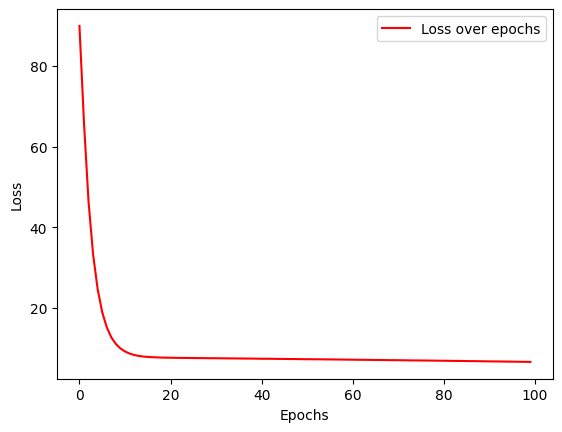

In [6]:
# SCOTASTIC GRADIENT DESCENT:

import numpy as np
import matplotlib.pyplot as plt

def initialization():
    w_input = np.array([[0.2, -0.3, 0.6], [-0.5, 0.7, -0.1], [0.8, -0.2, 0.9], [1.0, 0.4, -0.7]])
    b_input = np.array([0.1, -0.2, 0.3, 0.5])
    w_output = np.array([[0.7, -0.2, 0.1, 0.3], [-0.3, 0.8, -0.4, 0.2], [0.5, -0.6, 0.9, -0.7]])
    b_output = np.array([0.1, -0.2, 0.05])
    return w_input, b_input, w_output, b_output

def Leaky_Relu(x, alpha_=0.001):
    return np.maximum(alpha_ * x, x)

def forward_pass(x, w_input, w_output, b_input, b_output):
    z_input = np.dot(x, w_input.T) + b_input
    activation_z_input = Leaky_Relu(z_input)
    z_output = np.dot(activation_z_input, w_output.T) + b_output
    return z_input, activation_z_input, z_output

def loss_function(y, z_output):
    e = y - z_output
    loss = np.mean(e ** 2)
    return e, loss

def backward_pass(z_input, e, b_input, b_output, w_input, w_output, activation_z_input, x, lr=0.01, alpha_=0.001):
    prime_z_input = np.where(z_input > 0, 1, alpha_)
    deltas_output = -2 * e
    deltas_input = np.dot(deltas_output, w_output) * prime_z_input
    dw_output = np.dot(activation_z_input.T, deltas_output)   # Normalize by batch size (Here batch_size = 1)
    dw_input = np.dot(x.T, deltas_input)   # Normalize by batch size
    db_output = np.sum(deltas_output, axis=0) # Normalize by batch size
    db_input = np.sum(deltas_input, axis=0)  # Normalize by batch size

    w_input -= lr * dw_input.T
    w_output -= lr * dw_output.T
    b_input -= db_input * lr
    b_output -= db_output * lr

    return w_input, w_output, b_input, b_output

def stochastic_gradient_descent(x, y, lr=0.01, epochs=100, alpha_=0.001):
    w_input, b_input, w_output, b_output = initialization()
    losses = []
    num_samples = x.shape[0]

    for epoch in range(epochs):
        indices = np.arange(num_samples)
        np.random.shuffle(indices)
        x_shuffled = x[indices]
        y_shuffled = y[indices]

        epoch_loss = 0

        for i in range(num_samples):
            x_sample = x_shuffled[i:i+1]  # Shape: (1, num_features)
            y_sample = y_shuffled[i:i+1]  # Shape: (1, num_outputs)

            z_input, activation_z_input, z_output = forward_pass(x_sample, w_input, w_output, b_input, b_output)

            e, loss = loss_function(y_sample, z_output)
            epoch_loss += loss

            w_input, w_output, b_input, b_output = backward_pass(z_input, e, b_input, b_output, w_input, w_output, activation_z_input, x_sample, lr)

        losses.append(epoch_loss / num_samples)

    return w_input, w_output, b_input, b_output, losses

# Example usage
x = np.array([[1.0, 2.0, 6.0], [2.0, 3.0, 5.0], [3.0, 4.0, 8.0], [4.0, 5.0, 7.0],
              [5.0, 6.0, 9.0], [6.0, 7.0, 10.0], [7.0, 8.0, 11.0], [8.0, 9.0, 12.0],
              [9.0, 10.0, 13.0], [10.0, 11.0, 14.0]])

y = np.array([[3.0, 5.0, 7.0],
              [4.0, 6.0, 8.0],
              [5.0, 7.0, 9.0],
              [6.0, 8.0, 10.0],
              [7.0, 9.0, 11.0],
              [8.0, 10.0, 12.0],
              [9.0, 11.0, 13.0],
              [10.0, 12.0, 14.0],
              [11.0, 13.0, 15.0],
              [12.0, 14.0, 16.0]])  # Target values

w_input, b_input, w_output, b_output, losses = stochastic_gradient_descent(x, y, lr=0.01, epochs=100, alpha_=0.001)

print(f"Updated input weight:\n{w_input}\n")
print(f"Updated output weight:\n{w_output}\n")
print(f"Updated input bias:\n{b_input}\n")
print(f"Updated output bias:\n{b_output}\n")
print(f"First and final loss: {losses[0]}, {losses[-1]}")

plt.plot(losses, color='red', label="Loss over epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Initial loss: 69.89298320260734
Final loss: 16.581630762227128


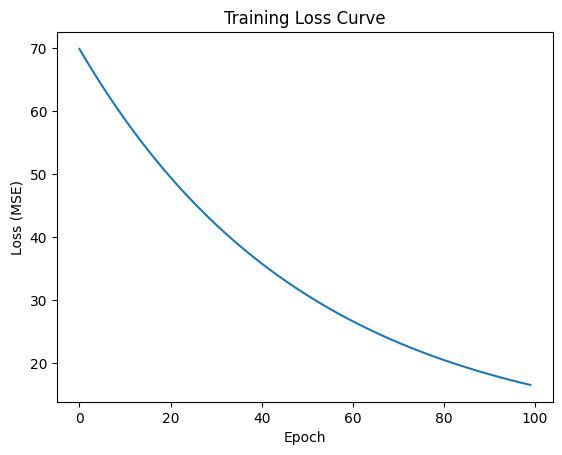

In [8]:
# FULL BATCH GRADIENT DESCENT:

import numpy as np
import matplotlib.pyplot as plt

def initialization():
    w_input = np.random.rand(4, 3)  # Shape: (hidden_neurons, input_features)
    b_input = np.random.rand(4)     # Shape: (hidden_neurons,)
    w_output = np.random.rand(3, 4) # Shape: (output_neurons, hidden_neurons)
    b_output = np.random.rand(3)    # Shape: (output_neurons,)
    return w_input, w_output, b_input, b_output

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def forward_pass(x, w_input, w_output, b_input, b_output):
    z_input = np.dot(x, w_input.T) + b_input  # Shape: (num_samples, hidden_neurons)
    z_input_activation = tanh(z_input)        # Shape: (num_samples, hidden_neurons)
    z_output = np.dot(z_input_activation, w_output.T) + b_output  # Shape: (num_samples, output_neurons)
    return z_input_activation, z_output, z_input

def loss_function(y, z_output):
    e = y - z_output  # Shape: (num_samples, output_neurons)
    loss = np.mean(e**2)  # Scalar
    return loss, e

def backward_pass(w_input, w_output, b_output, b_input, x, e, z_output, z_input, z_input_activation, lr=0.01):
    num_samples = x.shape[0]

    # Gradients for output layer
    deltas_output = -2 * e / num_samples  # Shape: (num_samples, output_neurons)
    dw_output = np.dot(z_input_activation.T, deltas_output) / num_samples  # Shape: (hidden_neurons, output_neurons)
    db_output = np.sum(deltas_output, axis=0)/ num_samples  # Shape: (output_neurons,)

    # Gradients for hidden layer
    activation_prime = tanh_derivative(z_input)  # Shape: (num_samples, hidden_neurons)
    deltas_input = np.dot(deltas_output, w_output) * activation_prime / num_samples # Shape: (num_samples, hidden_neurons)
    dw_input = np.dot(x.T, deltas_input) / num_samples # Shape: (input_features, hidden_neurons)
    db_input = np.sum(deltas_input, axis=0) / num_samples# Shape: (hidden_neurons,)

    # Update weights and biases
    w_input -= lr * dw_input.T
    w_output -= lr * dw_output.T
    b_input -= lr * db_input
    b_output -= lr * db_output

    return w_input, w_output, b_input, b_output


def batch_gradient_descent(x, y, lr=0.01, epochs=100):
    w_input, w_output, b_input, b_output = initialization()
    losses = []
    for i in range(epochs):

        z_input_activation, z_output, z_input = forward_pass(x, w_input, w_output, b_input, b_output)
        loss, e = loss_function(y, z_output)
        losses.append(loss)
        w_input, w_output, b_input, b_output = backward_pass(w_input, w_output, b_output, b_input, x, e, z_output, z_input, z_input_activation, lr)
    return w_input, w_output, b_input, b_output, losses

# Test set
x = np.array([[1.0, 2.0, 6.0],
              [2.0, 3.0, 5.0],
              [3.0, 4.0, 8.0],
              [4.0, 5.0, 7.0],
              [5.0, 6.0, 9.0],
              [6.0, 7.0, 10.0],
              [7.0, 8.0, 11.0],
              [8.0, 9.0, 12.0],
              [9.0, 10.0, 13.0],
              [10.0, 11.0, 14.0]])  # Input features (3 samples, 3 features)

y = np.array([[3.0, 5.0, 7.0],
              [4.0, 6.0, 8.0],
              [5.0, 7.0, 9.0],
              [6.0, 8.0, 10.0],
              [7.0, 9.0, 11.0],
              [8.0, 10.0, 12.0],
              [9.0, 11.0, 13.0],
              [10.0, 12.0, 14.0],
              [11.0, 13.0, 15.0],
              [12.0, 14.0, 16.0]])  # Target values (3 samples, 3 output neurons)

# Train the model

w_input, w_output, b_input, b_output, losses =batch_gradient_descent(x, y, lr=0.01, epochs=100)

# Print initial and final loss
print("Initial loss:", losses[0])
print("Final loss:", losses[-1])

# Plot the loss curve
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss Curve")
plt.show()

Initial loss: 49.71074943788426
Final loss: 8.551913320534542


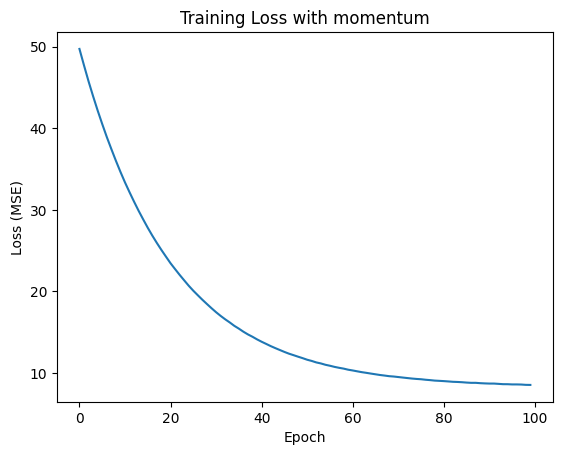

In [9]:
# MINI BATCH GRADIENT DESCENT WITH MOMENTUM


import numpy as np
import matplotlib.pyplot as plt

def initialization():
    w_input = np.random.rand(4, 3)  # Shape: (hidden_neurons, input_features)
    b_input = np.random.rand(4)     # Shape: (hidden_neurons,)
    w_output = np.random.rand(3, 4) # Shape: (output_neurons, hidden_neurons)
    b_output = np.random.rand(3)    # Shape: (output_neurons,)
    return w_input, w_output, b_input, b_output

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def forward_pass(x, w_input, w_output, b_input, b_output):
    z_input = np.dot(x, w_input.T) + b_input  # Shape: (num_samples, hidden_neurons)
    z_input_activation = tanh(z_input)        # Shape: (num_samples, hidden_neurons)
    z_output = np.dot(z_input_activation, w_output.T) + b_output  # Shape: (num_samples, output_neurons)
    return z_input_activation, z_output, z_input

def loss_function(y, z_output):
    e = y- z_output  # Shape: (num_samples, output_neurons)
    loss = np.mean(e**2)  # Scalar
    return loss, e

def backward_pass(w_input, w_output, b_input, b_output, x_batch, e, z_output, z_input, z_input_activation, lr=0.01,batch_size=2, momentum=0.9):
    num_samples = x_batch.shape[0]
    v_w_input= np.zeros_like(w_input)
    v_w_output= np.zeros_like(w_output)
    v_b_input= np.zeros_like(b_input)
    v_b_output= np.zeros_like(b_output)



    # Gradients for output layer
    deltas_output = -2 * e / batch_size  # Shape: (num_samples, output_neurons)
    dw_output = np.dot(z_input_activation.T, deltas_output) / batch_size  # Shape: (hidden_neurons, output_neurons)
    db_output = np.sum(deltas_output, axis=0) / batch_size  # Shape: (output_neurons,)
    v_w_output= momentum*v_w_output+ (1-momentum)*dw_output.T
    v_b_output= momentum*v_b_output + (1-momentum)*db_output


    # Gradients for hidden layer
    activation_prime = tanh_derivative(z_input)  # Shape: (num_samples, hidden_neurons)
    deltas_input = np.dot(deltas_output, w_output) * activation_prime / batch_size  # Shape: (num_samples, hidden_neurons)
    dw_input = np.dot( x_batch.T, deltas_input) / batch_size  # Shape: (input_features, hidden_neurons)
    db_input = np.sum(deltas_input, axis=0) / batch_size  # Shape: (hidden_neurons,)
    v_w_input= momentum*v_w_input+ (1-momentum)*dw_input.T
    v_b_input= momentum*v_b_input + (1-momentum)*db_input


    # Update weights and biases
    w_input -= lr * v_w_input
    w_output -= lr * v_w_output
    b_input -= lr * v_b_input
    b_output -= lr * v_b_output

    return w_input, w_output, b_input, b_output

def mini_batch_gradient_descent(x, y, lr=0.01, epochs=100, batch_size=2):
    w_input, w_output, b_input, b_output = initialization()
    losses = []
    num_samples= x.shape[0]
    for epoch in range(epochs):
      indices= np.arange(num_samples)
      np.random.shuffle(indices)
      x_shuffled= x[indices]
      y_shuffled= y[indices]
      epoch_loss=0
      for start in range(0, num_samples, batch_size):
        end= start+batch_size
        x_batch= x_shuffled[start:end]
        y_batch= y_shuffled[start:end]
        z_input_activation, z_output, z_input= forward_pass(x_batch, w_input, w_output, b_input, b_output)
        loss,e= loss_function(y_batch, z_output)
        epoch_loss+=loss
        w_input, w_output, b_input, b_output=  backward_pass(w_input, w_output, b_input, b_output, x_batch, e, z_output, z_input, z_input_activation, lr=0.01,batch_size=2, momentum=0.9)
      epoch_loss/= (num_samples//batch_size)
      losses.append(epoch_loss)
    return w_input, w_output, b_input, b_output,losses

# Test set
x = np.array([[1.0, 2.0, 6.0],
              [2.0, 3.0, 5.0],
              [3.0, 4.0, 8.0],
              [4.0, 5.0, 7.0],
              [5.0, 6.0, 9.0],
              [6.0, 7.0, 10.0],
              [7.0, 8.0, 11.0],
              [8.0, 9.0, 12.0],
              [9.0, 10.0, 13.0],
              [10.0, 11.0, 14.0]])

y = np.array([[3.0, 5.0, 7.0],
              [4.0, 6.0, 8.0],
              [5.0, 7.0, 9.0],
              [6.0, 8.0, 10.0],
              [7.0, 9.0, 11.0],
              [8.0, 10.0, 12.0],
              [9.0, 11.0, 13.0],
              [10.0, 12.0, 14.0],
              [11.0, 13.0, 15.0],
              [12.0, 14.0, 16.0]])  # Target values (10 samples, 3 output neurons)

# Train the model
w_input, w_output, b_input, b_output,losses = mini_batch_gradient_descent(x, y, lr=0.01, epochs=100, batch_size=2)

# Print initial and final loss
print("Initial loss:", losses[0])
print("Final loss:", losses[-1])


# Plot the loss curve
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss with momentum")
plt.show()

Initial loss: 57.224015154885294
Final loss: 8.233099222760107


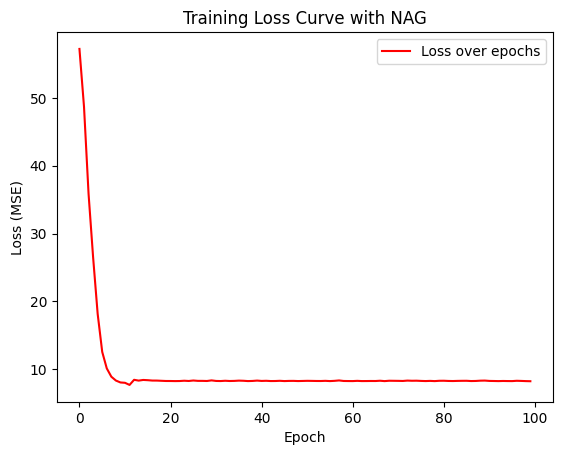

In [10]:
#MINI BATCH GRADIENT DESCENT WITH NAG

import numpy as np
import matplotlib.pyplot as plt

# Initialization function
def initialization():
    w_input = np.random.rand(4, 3)  # Shape: (hidden_neurons, input_features)
    b_input = np.random.rand(4)     # Shape: (hidden_neurons,)
    w_output = np.random.rand(3, 4) # Shape: (output_neurons, hidden_neurons)
    b_output = np.random.rand(3)    # Shape: (output_neurons,)
    return w_input, w_output, b_input, b_output

# Activation function: Tanh
def tanh(x):
    return np.tanh(x)

# Derivative of Tanh
def tanh_derivative(x):
    return 1 - np.tanh(x)**2

# Forward pass
def forward_pass(x, w_input, w_output, b_input, b_output):
    z_input = np.dot(x, w_input.T) + b_input  # Shape: (num_samples, hidden_neurons)
    z_input_activation = tanh(z_input)        # Shape: (num_samples, hidden_neurons)
    z_output = np.dot(z_input_activation, w_output.T) + b_output  # Shape: (num_samples, output_neurons)
    return z_input_activation, z_output, z_input

# Loss function: Mean Squared Error (MSE)
def loss_function(y, z_output):
    e = y - z_output  # Shape: (num_samples, output_neurons)
    loss = np.mean(e**2)  # Scalar
    return loss, e

# Backward pass with Nesterov Accelerated Gradient (NAG)
def backward_pass(w_input, w_output, b_input, b_output, x_batch, y_batch, z_output, z_input, z_input_activation, lr=0.01, batch_size=2, momentum=0.9):
    # Initialize velocity for weights and biases (if not already initialized)
    if not hasattr(backward_pass, 'v_w_input'):
        backward_pass.v_w_input = np.zeros_like(w_input)
        backward_pass.v_w_output = np.zeros_like(w_output)
        backward_pass.v_b_input = np.zeros_like(b_input)
        backward_pass.v_b_output = np.zeros_like(b_output)

    # Compute lookahead weights and biases
    w_input_lookahead = w_input - lr * momentum * backward_pass.v_w_input
    w_output_lookahead = w_output - lr * momentum * backward_pass.v_w_output
    b_input_lookahead = b_input - lr * momentum * backward_pass.v_b_input
    b_output_lookahead = b_output - lr * momentum * backward_pass.v_b_output

    # Forward pass with lookahead weights and biases
    _, z_output_lookahead, z_input_lookahead = forward_pass(x_batch, w_input_lookahead, w_output_lookahead, b_input_lookahead, b_output_lookahead)

    # Compute gradients at lookahead position
    e_lookahead = y_batch - z_output_lookahead
    deltas_output_lookahead = -2 * e_lookahead / batch_size
    dw_output_lookahead = np.dot(z_input_activation.T, deltas_output_lookahead) / batch_size
    db_output_lookahead = np.sum(deltas_output_lookahead, axis=0) / batch_size

    activation_prime_lookahead = tanh_derivative(z_input_lookahead)
    deltas_input_lookahead = np.dot(deltas_output_lookahead, w_output_lookahead) * activation_prime_lookahead / batch_size
    dw_input_lookahead = np.dot(x_batch.T, deltas_input_lookahead) / batch_size
    db_input_lookahead = np.sum(deltas_input_lookahead, axis=0) / batch_size

    # Update velocity for weights and biases
    backward_pass.v_w_input = momentum * backward_pass.v_w_input + (1 - momentum) * dw_input_lookahead.T
    backward_pass.v_w_output = momentum * backward_pass.v_w_output + (1 - momentum) * dw_output_lookahead.T
    backward_pass.v_b_input = momentum * backward_pass.v_b_input + (1 - momentum) * db_input_lookahead
    backward_pass.v_b_output = momentum * backward_pass.v_b_output + (1 - momentum) * db_output_lookahead

    # Update weights and biases using velocity
    w_input -= lr * backward_pass.v_w_input
    w_output -= lr * backward_pass.v_w_output
    b_input -= lr * backward_pass.v_b_input
    b_output -= lr * backward_pass.v_b_output

    return w_input, w_output, b_input, b_output

# Mini-batch gradient descent with NAG
def mini_batch_gradient_descent(x, y, lr=0.01, epochs=100, batch_size=2, momentum=0.9):
    w_input, w_output, b_input, b_output = initialization()
    losses = []
    num_samples = x.shape[0]

    for epoch in range(epochs):
        # Shuffle the dataset
        indices = np.arange(num_samples)
        np.random.shuffle(indices)
        x_shuffled = x[indices]
        y_shuffled = y[indices]

        epoch_loss = 0

        # Process mini-batches
        for start in range(0, num_samples, batch_size):
            end = start + batch_size
            x_batch = x_shuffled[start:end]
            y_batch = y_shuffled[start:end]

            # Forward pass
            z_input_activation, z_output, z_input = forward_pass(x_batch, w_input, w_output, b_input, b_output)

            # Compute loss
            loss, e = loss_function(y_batch, z_output)
            epoch_loss += loss

            # Backward pass with NAG
            w_input, w_output, b_input, b_output = backward_pass(w_input, w_output, b_input, b_output, x_batch, y_batch, z_output, z_input, z_input_activation, lr, batch_size, momentum)

        # Average loss for the epoch
        epoch_loss /= (num_samples // batch_size)
        losses.append(epoch_loss)

    return w_input, w_output, b_input, b_output, losses

# Test set
x = np.array([[1.0, 2.0, 6.0],
              [2.0, 3.0, 5.0],
              [3.0, 4.0, 8.0],
              [4.0, 5.0, 7.0],
              [5.0, 6.0, 9.0],
              [6.0, 7.0, 10.0],
              [7.0, 8.0, 11.0],
              [8.0, 9.0, 12.0],
              [9.0, 10.0, 13.0],
              [10.0, 11.0, 14.0]])

y = np.array([[3.0, 5.0, 7.0],
              [4.0, 6.0, 8.0],
              [5.0, 7.0, 9.0],
              [6.0, 8.0, 10.0],
              [7.0, 9.0, 11.0],
              [8.0, 10.0, 12.0],
              [9.0, 11.0, 13.0],
              [10.0, 12.0, 14.0],
              [11.0, 13.0, 15.0],
              [12.0, 14.0, 16.0]])  # Target values (10 samples, 3 output neurons)

# Train the model
w_input, w_output, b_input, b_output, losses = mini_batch_gradient_descent(x, y, lr=0.01, epochs=100, batch_size=2, momentum=0.9)

# Print initial and final loss
print("Initial loss:", losses[0])
print("Final loss:", losses[-1])

# Plot the loss curve
plt.plot(losses, color='red', label="Loss over epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss Curve with NAG")
plt.legend()
plt.show()

Initial loss: 475.44358334713417
Final loss: 12.708681371052


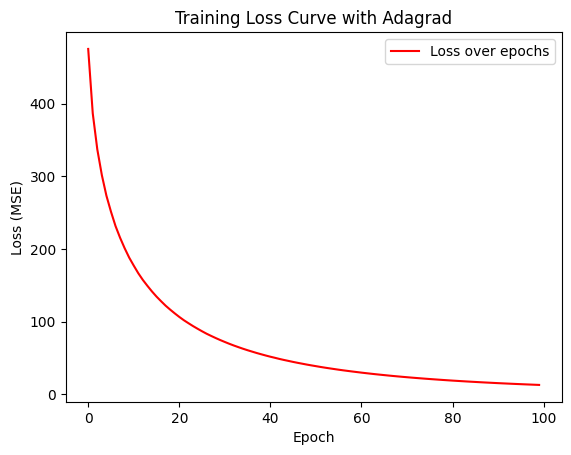

In [11]:
#MINI BATCH GRADIENT DESCENT WITH ADAGRAD

import numpy as np
import matplotlib.pyplot as plt

def initialization():
    # Keep original weight dimensions
    w_input = np.random.rand(4, 3)  # Shape: (hidden_neurons, input_features)
    b_input = np.random.rand(4)     # Shape: (hidden_neurons,)
    w_output = np.random.rand(3, 4) # Shape: (output_neurons, hidden_neurons)
    b_output = np.random.rand(3)    # Shape: (output_neurons,)
    return w_input, w_output, b_input, b_output

def Leaky_Relu(z, alpha=0.001):
    return np.maximum(z, alpha * z)

def Leaky_Relu_derivative(z, alpha=0.001):
    return np.where(z > 0, 1, alpha)

def forward_pass(x_batch, w_input, w_output, b_input, b_output):
    # Forward pass
    z_input = np.dot(x_batch, w_input.T) + b_input  # (batch_size, hidden_neurons)
    z_input_activation = Leaky_Relu(z_input)  # (batch_size, hidden_neurons)
    z_output = np.dot(z_input_activation, w_output.T) + b_output  # (batch_size, output_neurons)
    return z_input_activation, z_output, z_input

def loss_function(z_output, y_batch):
    # Compute loss
    e = y_batch - z_output  # (batch_size, output_neurons)
    loss = np.mean(e**2)  # Scalar
    return loss, e

def backward_pass(w_input, w_output, b_input, b_output, x_batch, y_batch, z_output, z_input, z_input_activation, lr=0.01, batch_size=2, epsilon=1e-8):
    # Initializing gradient accumulators:
    if not hasattr(backward_pass, 'G_w_input'):
        backward_pass.G_w_input = np.zeros_like(w_input)
        backward_pass.G_w_output = np.zeros_like(w_output)
        backward_pass.G_b_input = np.zeros_like(b_input)
        backward_pass.G_b_output = np.zeros_like(b_output)

    # Gradients for output layer
    deltas_output = -2 * (y_batch - z_output) / batch_size  # (batch_size, output_neurons)
    dw_output = np.dot(deltas_output.T, z_input_activation) / batch_size  # (output_neurons, hidden_neurons)
    db_output = np.sum(deltas_output, axis=0) / batch_size  # (output_neurons,)

    # Gradients for hidden layer
    activation_prime = Leaky_Relu_derivative(z_input)  # (batch_size, hidden_neurons)
    deltas_input = np.dot(deltas_output, w_output) * activation_prime / batch_size  # (batch_size, hidden_neurons)
    dw_input = np.dot(deltas_input.T, x_batch) / batch_size  # (hidden_neurons, input_features)
    db_input = np.sum(deltas_input, axis=0) / batch_size  # (hidden_neurons,)

    # Accumulating squared gradients for all params:
    backward_pass.G_w_input += dw_input**2
    backward_pass.G_w_output += dw_output**2
    backward_pass.G_b_input += db_input**2
    backward_pass.G_b_output += db_output**2

    # Update weights and biases using Adagrad
    w_input -= lr * dw_input / (np.sqrt(backward_pass.G_w_input) + epsilon)
    w_output -= lr * dw_output / (np.sqrt(backward_pass.G_w_output) + epsilon)
    b_input -= lr * db_input / (np.sqrt(backward_pass.G_b_input) + epsilon)
    b_output -= lr * db_output / (np.sqrt(backward_pass.G_b_output) + epsilon)

    return w_input, w_output, b_input, b_output

def mini_batch_gradient_descent(x, y, lr=0.01, epochs=100, batch_size=2):
    w_input, w_output, b_input, b_output = initialization()
    losses = []
    num_samples = x.shape[0]

    for epoch in range(epochs):
        # Shuffle the dataset
        indices = np.arange(num_samples)
        np.random.shuffle(indices)
        x_shuffled = x[indices]
        y_shuffled = y[indices]

        epoch_loss = 0

        # Process mini-batches
        for start in range(0, num_samples, batch_size):
            end = start + batch_size
            x_batch = x_shuffled[start:end]
            y_batch = y_shuffled[start:end]

            # Forward pass
            z_input_activation, z_output, z_input = forward_pass(x_batch, w_input, w_output, b_input, b_output)

            # Compute loss
            loss, e = loss_function(z_output, y_batch)
            epoch_loss += loss

            # Backward pass with Adagrad
            w_input, w_output, b_input, b_output = backward_pass(w_input, w_output, b_input, b_output, x_batch, y_batch, z_output, z_input, z_input_activation, lr, batch_size)

        # Average loss for the epoch
        epoch_loss /= (num_samples // batch_size)
        losses.append(epoch_loss)

    return w_input, w_output, b_input, b_output, losses

# Test set
x = np.array([[1.0, 2.0, 6.0],
              [2.0, 3.0, 5.0],
              [3.0, 4.0, 8.0],
              [4.0, 5.0, 7.0],
              [5.0, 6.0, 9.0],
              [6.0, 7.0, 10.0],
              [7.0, 8.0, 11.0],
              [8.0, 9.0, 12.0],
              [9.0, 10.0, 13.0],
              [10.0, 11.0, 14.0]])

y = np.array([[3.0, 5.0, 7.0],
              [4.0, 6.0, 8.0],
              [5.0, 7.0, 9.0],
              [6.0, 8.0, 10.0],
              [7.0, 9.0, 11.0],
              [8.0, 10.0, 12.0],
              [9.0, 11.0, 13.0],
              [10.0, 12.0, 14.0],
              [11.0, 13.0, 15.0],
              [12.0, 14.0, 16.0]])

# Train the model
w_input, w_output, b_input, b_output, losses = mini_batch_gradient_descent(x, y, lr=0.01, epochs=100, batch_size=2)

# Print initial and final loss
print("Initial loss:", losses[0])
print("Final loss:", losses[-1])

# Plot the loss curve
plt.plot(losses, color='red', label="Loss over epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss Curve with Adagrad")
plt.legend()
plt.show()

Initial loss: 125.20018358174013
Final loss: 0.09063007672435144


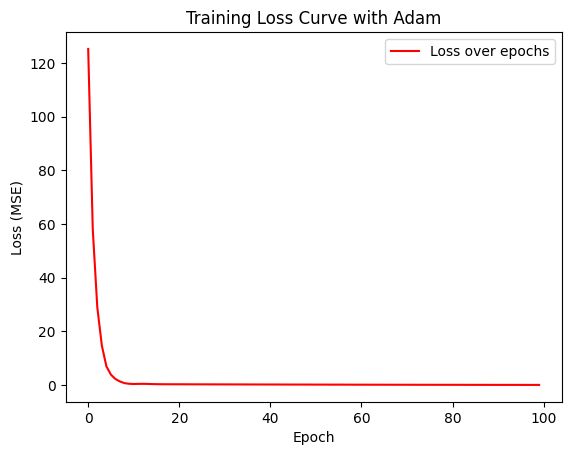

In [12]:

#MINI BATCH GRADIENT DESCENT WITH ADAM

import numpy as np
import matplotlib.pyplot as plt

def initialization():
    w_input = np.random.rand(4, 3)
    w_output = np.random.rand(3, 4)
    b_input = np.random.rand(4)
    b_output = np.random.rand(3)
    return w_input, w_output, b_input, b_output

def Leaky_Relu(z, alpha=0.001):
    return np.maximum(z, alpha * z)

def Leaky_Relu_derivative(z, alpha=0.001):
    return np.where(z > 0, 1, alpha)

def forward_pass(x_batch, w_input, w_output, b_input, b_output):
    z_input = np.dot(x_batch, w_input.T) + b_input
    z_input_activation = Leaky_Relu(z_input)
    z_output = np.dot(z_input_activation, w_output.T) + b_output
    return z_input_activation, z_output, z_input

def loss_function(z_output, y_batch):
    e = y_batch - z_output
    loss = np.mean(e**2)
    return loss, e

def backward_pass(w_input, w_output, b_input, b_output, x_batch, y_batch, z_output, z_input, z_input_activation, lr=0.001, batch_size=2, epsilon=1e-8,beta_1=0.9,beta_2=0.99):
   # Initializing gradient accumulators:
    if not hasattr(backward_pass, 'm_w_input'):
        backward_pass.m_w_input = np.zeros_like(w_input)
        backward_pass.m_w_output = np.zeros_like(w_output)
        backward_pass.m_b_input = np.zeros_like(b_input)
        backward_pass.m_b_output = np.zeros_like(b_output)
        backward_pass.v_w_input = np.zeros_like(w_input)
        backward_pass.v_w_output = np.zeros_like(w_output)
        backward_pass.v_b_input = np.zeros_like(b_input)
        backward_pass.v_b_output = np.zeros_like(b_output)
        backward_pass.t= 0

    backward_pass.t+=1
    # Gradients for output layer
    deltas_output = -2 * (y_batch - z_output) / batch_size
    dw_output = np.dot(deltas_output.T, z_input_activation) / batch_size
    db_output = np.sum(deltas_output, axis=0) / batch_size

    # Gradients for hidden layer
    activation_prime = Leaky_Relu_derivative(z_input)
    deltas_input = np.dot(deltas_output, w_output) * activation_prime / batch_size
    dw_input = np.dot(deltas_input.T, x_batch) / batch_size
    db_input = np.sum(deltas_input, axis=0) / batch_size

    #updating first moment(Momentum):
    backward_pass.m_w_input = beta_1*backward_pass.m_w_input+(1-beta_1)*dw_input
    backward_pass.m_w_output = beta_1*backward_pass.m_w_output+(1-beta_1)*dw_output
    backward_pass.m_b_input = beta_1*backward_pass.m_b_input+(1-beta_1)*db_input
    backward_pass.m_b_output = beta_1*backward_pass.m_b_output+(1-beta_1)*db_output

    #updating second moment(Adaptive learning rates):

    backward_pass.v_w_input = beta_2*backward_pass.v_w_input+(1-beta_2)*dw_input**2
    backward_pass.v_w_output = beta_2*backward_pass.v_w_output+(1-beta_2)*dw_output**2
    backward_pass.v_b_input = beta_2*backward_pass.v_b_input+(1-beta_2)*db_input**2
    backward_pass.v_b_output = beta_2*backward_pass.v_b_output+(1-beta_2)*db_output**2



    #bias correction:
    m_w_input_hat = backward_pass.m_w_input / (1 - beta_1**backward_pass.t)
    m_w_output_hat = backward_pass.m_w_output / (1 - beta_1**backward_pass.t)
    m_b_input_hat = backward_pass.m_b_input / (1 - beta_1**backward_pass.t)
    m_b_output_hat = backward_pass.m_b_output / (1 - beta_1**backward_pass.t)

    v_w_input_hat = backward_pass.v_w_input / (1 - beta_2**backward_pass.t)
    v_w_output_hat = backward_pass.v_w_output / (1 - beta_2**backward_pass.t)
    v_b_input_hat = backward_pass.v_b_input / (1 - beta_2**backward_pass.t)
    v_b_output_hat = backward_pass.v_b_output / (1 - beta_2**backward_pass.t)


    #updating params:

    w_input -= lr * m_w_input_hat / (np.sqrt(v_w_input_hat) + epsilon)
    w_output -= lr * m_w_output_hat / (np.sqrt(v_w_output_hat) + epsilon)
    b_input -= lr * m_b_input_hat / (np.sqrt(v_b_input_hat) + epsilon)
    b_output -= lr * m_b_output_hat / (np.sqrt(v_b_output_hat) + epsilon)

    return w_input,w_output,b_input,b_output

def mini_batch_gradient_descent(x, y, lr=0.001, epochs=100, batch_size=2,epsilon=1e-8,beta_1=0.9,beta_2=0.99):
    w_input, w_output, b_input, b_output = initialization()
    losses = []
    num_samples = x.shape[0]

    for epoch in range(epochs):
        # Shuffle the dataset
        indices = np.arange(num_samples)
        np.random.shuffle(indices)
        x_shuffled = x[indices]
        y_shuffled = y[indices]

        epoch_loss = 0

        # Process mini-batches
        for start in range(0, num_samples, batch_size):
            end = start + batch_size
            x_batch = x_shuffled[start:end]
            y_batch = y_shuffled[start:end]

            # Forward pass
            z_input_activation, z_output, z_input = forward_pass(x_batch, w_input, w_output, b_input, b_output)

            # Compute loss
            loss, e = loss_function(z_output, y_batch)
            epoch_loss += loss

            # Backward pass with Adagrad
            w_input, w_output, b_input, b_output = backward_pass(w_input, w_output, b_input, b_output, x_batch, y_batch, z_output, z_input, z_input_activation, lr=0.01, batch_size=2, epsilon=1e-8,beta_1=0.9,beta_2=0.99)

        # Average loss for the epoch
        epoch_loss /= (num_samples // batch_size)
        losses.append(epoch_loss)

    return w_input, w_output, b_input, b_output, losses

# Test set
x = np.array([[1.0, 2.0, 6.0],
              [2.0, 3.0, 5.0],
              [3.0, 4.0, 8.0],
              [4.0, 5.0, 7.0],
              [5.0, 6.0, 9.0],
              [6.0, 7.0, 10.0],
              [7.0, 8.0, 11.0],
              [8.0, 9.0, 12.0],
              [9.0, 10.0, 13.0],
              [10.0, 11.0, 14.0]])

y = np.array([[3.0, 5.0, 7.0],
              [4.0, 6.0, 8.0],
              [5.0, 7.0, 9.0],
              [6.0, 8.0, 10.0],
              [7.0, 9.0, 11.0],
              [8.0, 10.0, 12.0],
              [9.0, 11.0, 13.0],
              [10.0, 12.0, 14.0],
              [11.0, 13.0, 15.0],
              [12.0, 14.0, 16.0]])

# Train the model
w_input, w_output, b_input, b_output, losses = mini_batch_gradient_descent(x, y, lr=0.001, epochs=100, batch_size=2)

# Print initial and final loss
print("Initial loss:", losses[0])
print("Final loss:", losses[-1])

# Plot the loss curve
plt.plot(losses, color='red', label="Loss over epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss Curve with Adam")
plt.legend()
plt.show()

Initial loss: 55.60902713293395
Final loss: 0.4799465582228569


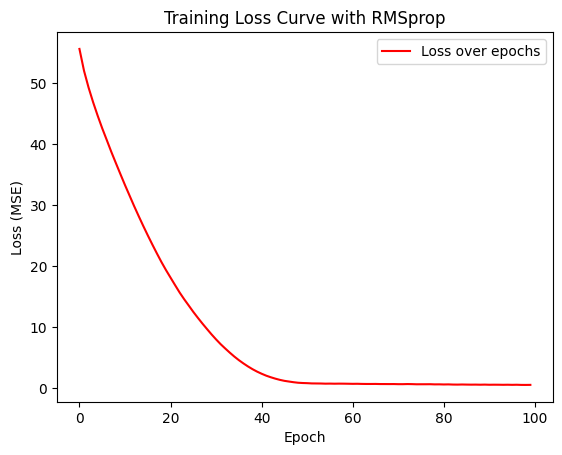

In [15]:
#MINI BATCH GRADIENT DESCENT WITH RMSPROP

import numpy as np
import matplotlib.pyplot as plt

def initialization():
    # Input layer weights (4 hidden units, 3 input features)
    w_input = np.random.normal(0, np.sqrt(1/3), (4, 3))  # Variance = 1/fan-in
    # Output layer weights (3 output units, 4 hidden units)
    w_output = np.random.normal(0, np.sqrt(1/4), (3, 4))  # Variance = 1/fan-in
    # Biases (initialized to 0 or small random values)
    b_input = np.zeros((4,))  # Biases for hidden layer
    b_output = np.zeros((3,))  # Biases for output layer
    return w_input, w_output, b_input, b_output

def Leaky_Relu(z, alpha=0.001):
    return np.maximum(z, alpha * z)

def Leaky_Relu_derivative(z, alpha=0.001):
    return np.where(z > 0, 1, alpha)

def forward_pass(x_batch, w_input, w_output, b_input, b_output):
    z_input = np.dot(x_batch, w_input.T) + b_input
    z_input_activation = Leaky_Relu(z_input)
    z_output = np.dot(z_input_activation, w_output.T) + b_output
    return z_input_activation, z_output, z_input

def loss_function(z_output, y_batch):
    e = y_batch - z_output
    loss = np.mean(e**2)
    return loss, e

def backward_pass(w_input, w_output, b_input, b_output, x_batch, y_batch, z_output, z_input, z_input_activation, lr=0.001, batch_size=2, epsilon=1e-8,beta=0.9):

  if not hasattr(backward_pass,'E_w_input'):

    backward_pass.E_w_input = np.zeros_like(w_input)
    backward_pass.E_w_output = np.zeros_like(w_output)
    backward_pass.E_b_input = np.zeros_like(b_input)
    backward_pass.E_b_output = np.zeros_like(b_output)

  # Gradients for output layer
  deltas_output = -2 * (y_batch - z_output) / batch_size
  dw_output = np.dot(deltas_output.T, z_input_activation) / batch_size
  db_output = np.sum(deltas_output, axis=0) / batch_size

  # Gradients for hidden layer
  activation_prime = Leaky_Relu_derivative(z_input)
  deltas_input = np.dot(deltas_output, w_output) * activation_prime / batch_size
  dw_input = np.dot(deltas_input.T, x_batch) / batch_size
  db_input = np.sum(deltas_input, axis=0) / batch_size



 #accumulating exponetial decaying average of past squared gradients for all params:
  backward_pass.E_w_input = beta*backward_pass.E_w_input+(1-beta)*dw_input**2
  backward_pass.E_w_output = beta*backward_pass.E_w_output+(1-beta)*dw_output**2
  backward_pass.E_b_input = beta*backward_pass.E_b_input+(1-beta)*db_input**2
  backward_pass.E_b_output = beta*backward_pass.E_b_output+(1-beta)*db_output**2

  #updating prams:
  w_input -= (lr/(np.sqrt(backward_pass.E_w_input)+epsilon))*dw_input
  w_output -= (lr/(np.sqrt(backward_pass.E_w_output)+epsilon))*dw_output
  b_input -= (lr/(np.sqrt(backward_pass.E_b_input)+epsilon))*db_input
  b_output -= (lr/(np.sqrt(backward_pass.E_b_output)+epsilon))*db_output

  return w_input,w_output,b_input,b_output

def mini_batch_gradient_descent(x, y, lr=0.001, epochs=100, batch_size=2,epsilon=1e-8,beta=0.9):
    w_input, w_output, b_input, b_output = initialization()
    losses = []
    num_samples = x.shape[0]

    for epoch in range(epochs):
        # Shuffle the dataset
        indices = np.arange(num_samples)
        np.random.shuffle(indices)
        x_shuffled = x[indices]
        y_shuffled = y[indices]

        epoch_loss = 0

        # Process mini-batches
        for start in range(0, num_samples, batch_size):
            end = start + batch_size
            x_batch = x_shuffled[start:end]
            y_batch = y_shuffled[start:end]

            # Forward pass
            z_input_activation, z_output, z_input = forward_pass(x_batch, w_input, w_output, b_input, b_output)

            # Compute loss
            loss, e = loss_function(z_output, y_batch)
            epoch_loss += loss

            # Backward pass with Adagrad
            w_input, w_output, b_input, b_output =backward_pass(w_input, w_output, b_input, b_output, x_batch, y_batch, z_output, z_input, z_input_activation, lr=0.001, batch_size=2, epsilon=1e-8,beta=0.9)

        # Average loss for the epoch
        epoch_loss /= (num_samples // batch_size)
        losses.append(epoch_loss)

    return w_input, w_output, b_input, b_output, losses

x = np.array([[1.0, 2.0, 6.0],
              [2.0, 3.0, 5.0],
              [3.0, 4.0, 8.0],
              [4.0, 5.0, 7.0],
              [5.0, 6.0, 9.0],
              [6.0, 7.0, 10.0],
              [7.0, 8.0, 11.0],
              [8.0, 9.0, 12.0],
              [9.0, 10.0, 13.0],
              [10.0, 11.0, 14.0]])

y = np.array([[3.0, 5.0, 7.0],
              [4.0, 6.0, 8.0],
              [5.0, 7.0, 9.0],
              [6.0, 8.0, 10.0],
              [7.0, 9.0, 11.0],
              [8.0, 10.0, 12.0],
              [9.0, 11.0, 13.0],
              [10.0, 12.0, 14.0],
              [11.0, 13.0, 15.0],
              [12.0, 14.0, 16.0]])


# Train the model
w_input, w_output, b_input, b_output, losses = mini_batch_gradient_descent(x, y, lr=0.001, epochs=100, batch_size=2)

# Print initial and final loss
print("Initial loss:", losses[0])
print("Final loss:", losses[-1])

# Plot the loss curve
plt.plot(losses, color='red', label="Loss over epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss Curve with RMSprop")
plt.legend()
plt.show()
